<a href="https://colab.research.google.com/github/V-AISHVARYA/LGMVIP-DataScience-Task-2/blob/main/Stock_Market_Prediction_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LGMVIP TASK2:
**Stock Market Prediction And Forecasting Using Stacked LSTM**


~Aishvarya.V

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


## Reading the dataset

In [ ]:
tg = pd.read_csv("NSE-TATAGLOBAL.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
tg.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
tg.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


#### Displaying the basic statistics about data

In [ ]:
tg.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


## Sorting the data

#### Checking for null values

In [ ]:
NAN = [(c, tg[c].isnull().mean()*100) for c in tg]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Last,0.0
5,Close,0.0
6,Total Trade Quantity,0.0
7,Turnover (Lacs),0.0


In [ ]:
srt=tg.sort_values(by='Date')
srt.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
srt.reset_index(inplace=True)

In [ ]:
srt.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


## Data Visualization

#### Plotting the graph for the Date and Close

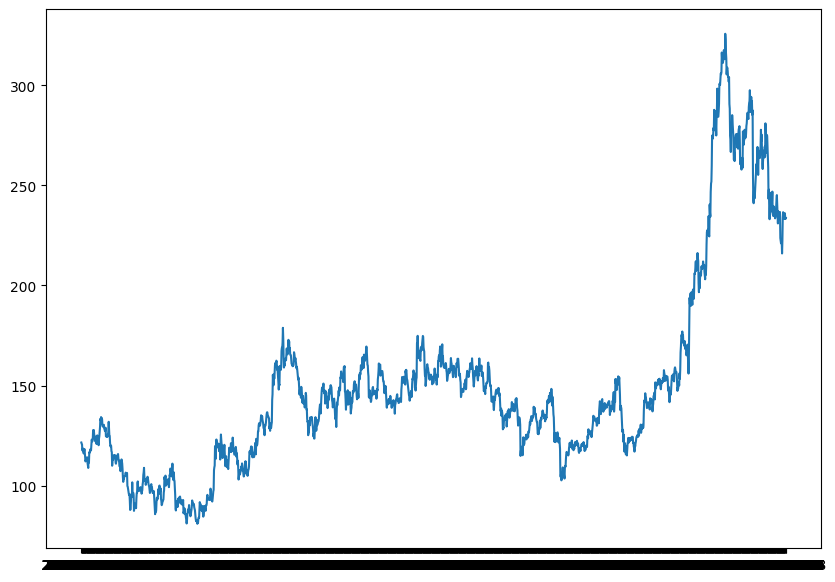

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(srt['Date'],srt['Close'])

In [ ]:
close_srt = srt['Close']
close_srt

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

## Feature Scaling(MinMax Scaler)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
close_srt = scaler.fit_transform(np.array(close_srt).reshape(-1, 1))
close_srt

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

Since LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1

## Splitting the dataset

In [ ]:
train_size = int(len(close_srt)*0.7)
test_size = len(close_srt) - train_size
train_data,test_data = close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]

In [ ]:
train_data.shape

(1424, 1)

In [ ]:
test_data.shape

(611, 1)

## convert an array of values into a dataset matrix

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

## Reshaping of dataset

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [ ]:
print(X_test.shape), print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
X_train

array([[[0.16584967],
        [0.16319444],
        [0.1621732 ],
        ...,
        [0.14011438],
        [0.13848039],
        [0.12479575]],

       [[0.16319444],
        [0.1621732 ],
        [0.14971405],
        ...,
        [0.13848039],
        [0.12479575],
        [0.12254902]],

       [[0.1621732 ],
        [0.14971405],
        [0.15400327],
        ...,
        [0.12479575],
        [0.12254902],
        [0.13010621]],

       ...,

       [[0.18280229],
        [0.19178922],
        [0.19219771],
        ...,
        [0.16441993],
        [0.15236928],
        [0.15482026]],

       [[0.19178922],
        [0.19219771],
        [0.19281046],
        ...,
        [0.15236928],
        [0.15482026],
        [0.15420752]],

       [[0.19219771],
        [0.19281046],
        [0.21058007],
        ...,
        [0.15482026],
        [0.15420752],
        [0.15012255]]])

In [ ]:
X_test

array([[[0.1621732 ],
        [0.15951797],
        [0.16707516],
        ...,
        [0.24775327],
        [0.24836601],
        [0.25020425]],

       [[0.15951797],
        [0.16707516],
        [0.15992647],
        ...,
        [0.24836601],
        [0.25020425],
        [0.25020425]],

       [[0.16707516],
        [0.15992647],
        [0.16053922],
        ...,
        [0.25020425],
        [0.25020425],
        [0.23999183]],

       ...,

       [[0.86519608],
        [0.84027778],
        [0.84497549],
        ...,
        [0.62888072],
        [0.62765523],
        [0.62234477]],

       [[0.84027778],
        [0.84497549],
        [0.87111928],
        ...,
        [0.62765523],
        [0.62234477],
        [0.63378268]],

       [[0.84497549],
        [0.87111928],
        [0.85273693],
        ...,
        [0.62234477],
        [0.63378268],
        [0.62622549]]])

## Creating the stacked LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
#Creating the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## Prediction and Checking Performance

In [ ]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 12s 245ms/step - loss: 0.0089 - val_loss: 0.0029
Epoch 2/60
19/19 [==============================] - 4s 217ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 3/60
19/19 [==============================] - 8s 416ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 6s 330ms/step - loss: 9.1378e-04 - val_loss: 0.0013
Epoch 5/60
19/19 [==============================] - 3s 174ms/step - loss: 8.8574e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 175ms/step - loss: 8.1505e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 4s 189ms/step - loss: 7.8598e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 4s 218ms/step - loss: 7.7313e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 3s 171ms/step - loss: 7.4974e-04 - val_loss: 9.7703e-04
Epoch 10/60
19/19 [==============================] - 3s 174ms/step - lo

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 1s 36ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


## Calculating the Performance

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))


133.7619086981855

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

208.45075166189073

#### Plotting the graph with predicted train data, test data with actual data

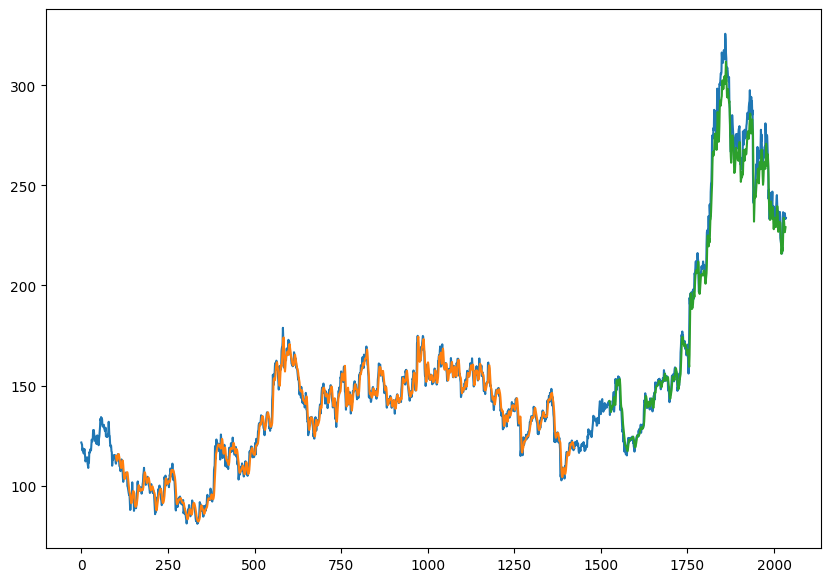

In [ ]:
look_back=100

# shift train predictions for plotting
trainPredictPlot = np.empty_like(close_srt)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(close_srt)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(10,7))
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Prediction for next 30 days

In [ ]:
len(test_data)

611

In [ ]:
pred_input=test_data[511:].reshape(1,-1)
pred_input.shape

(1, 100)

In [ ]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [ ]:
lst_output=[] #predicted 30 days output
n_steps=100
i=0
while(i<30): #for 30 days-change according to the number of days you want

    if(len(temp_input)>100):
        #print(temp_input)
        pred_input=np.array(temp_input[1:]) # for last 100 data
        print("{} day input {}".format(i,pred_input))
        pred_input=pred_input.reshape(1,-1)
        pred_input = pred_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(pred_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        pred_input = pred_input.reshape((1, n_steps,1))
        yhat = model.predict(pred_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.60480237]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464

#### Ploting last 130 days Closing Price

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
len(close_srt)

2035

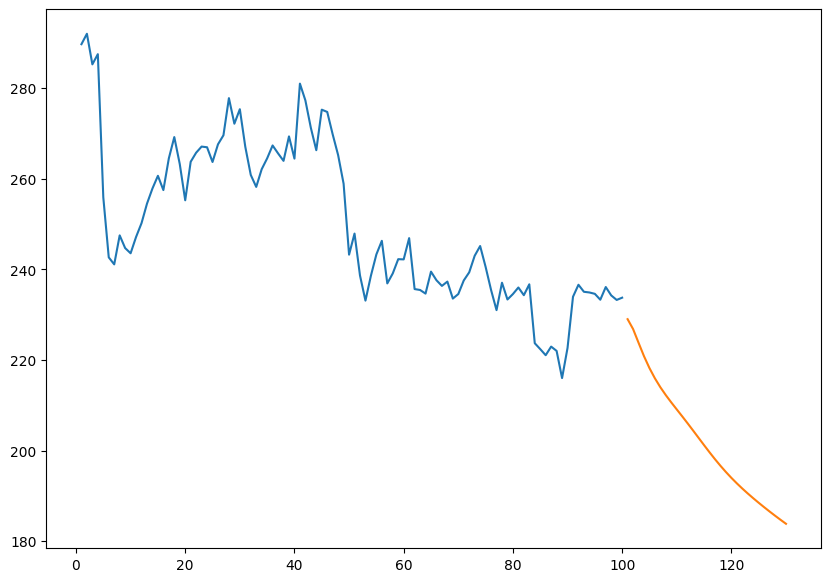

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(day_new,scaler.inverse_transform(close_srt[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

#### Appending in a list is done to make continuous graph

In [ ]:
df3=close_srt.tolist()
#adding specified list of predicted 30 days output to the end of last 100 days output
df3.extend(lst_output)

In [ ]:
print(len(df3))

2065


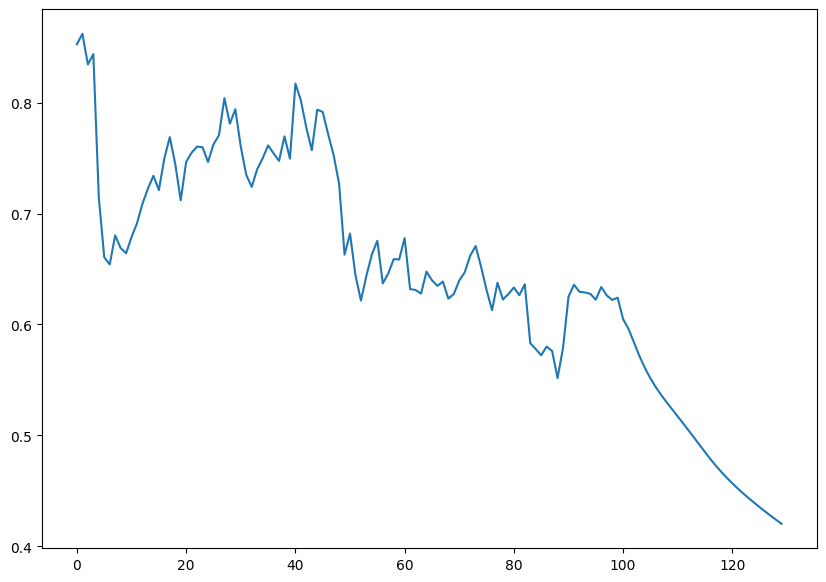

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(df3[1935:]) #latest 100 days output

#### Plotting the graph with predicted 30 days output

In [ ]:
df3=scaler.inverse_transform(df3).tolist() #undoing scaling of df3

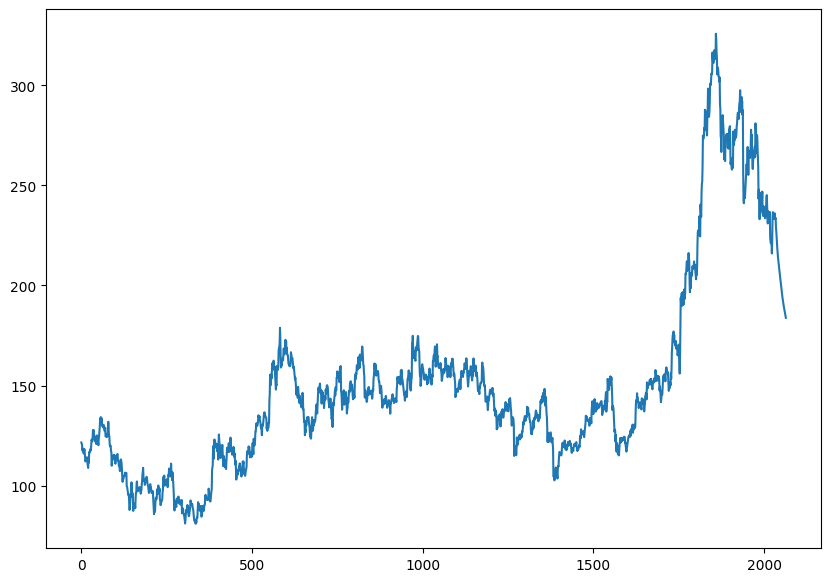

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(df3)